In [294]:
# 필요 라이브러리 로드
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform

In [295]:
day_df = pd.read_csv('usage_by_weather2.csv')
day_df

,Unnamed: 0,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,customer,wh,kwh
0,0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,783260,49968118.15,11154070.87
1,1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,783281,43576388.06,10820313.94
2,2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,783288,44345831.21,10577876.27
3,3,2021,1,4,1.2,3.1,0.0,71.8,10.07,783288,49666971.53,11410542.58
4,4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,783310,44114435.78,11097614.74
...,...,...,...,...,...,...,...,...,...,...,...,...
725,725,2022,12,27,0.3,1.8,0.0,74.1,13.08,800308,31743683.54,9442942.40
726,726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,802036,32641190.23,9679363.18
727,727,2022,12,29,0.7,2.1,0.0,63.3,12.25,803784,58820056.15,11754265.48
728,728,2022,12,30,1.0,6.3,0.0,70.4,9.25,805066,52733978.57,12149583.10


In [296]:
day_df = day_df.drop(columns=['Unnamed: 0', 'customer', 'wh'])
day_df

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,10820313.94
2,2021,1,3,-0.6,7.3,0.0,54.6,10.37,10577876.27
3,2021,1,4,1.2,3.1,0.0,71.8,10.07,11410542.58
4,2021,1,5,-0.2,8.0,0.0,64.9,7.74,11097614.74
...,...,...,...,...,...,...,...,...,...
725,2022,12,27,0.3,1.8,0.0,74.1,13.08,9442942.40
726,2022,12,28,-0.2,5.3,0.0,75.4,9.62,9679363.18
727,2022,12,29,0.7,2.1,0.0,63.3,12.25,11754265.48
728,2022,12,30,1.0,6.3,0.0,70.4,9.25,12149583.10


In [297]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   month           730 non-null    int64  
 2   day             730 non-null    int64  
 3   temp            730 non-null    float64
 4   cloud           730 non-null    float64
 5   rainfall_total  730 non-null    float64
 6   Humidity_mean   730 non-null    float64
 7   solar           730 non-null    float64
 8   kwh             730 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 51.5 KB


In [298]:
day_df.isnull().sum()

year              0
month             0
day               0
temp              0
cloud             0
rainfall_total    0
Humidity_mean     0
solar             0
kwh               0
dtype: int64

Text(0.5, 1.0, '날짜와 전력 상관관계')

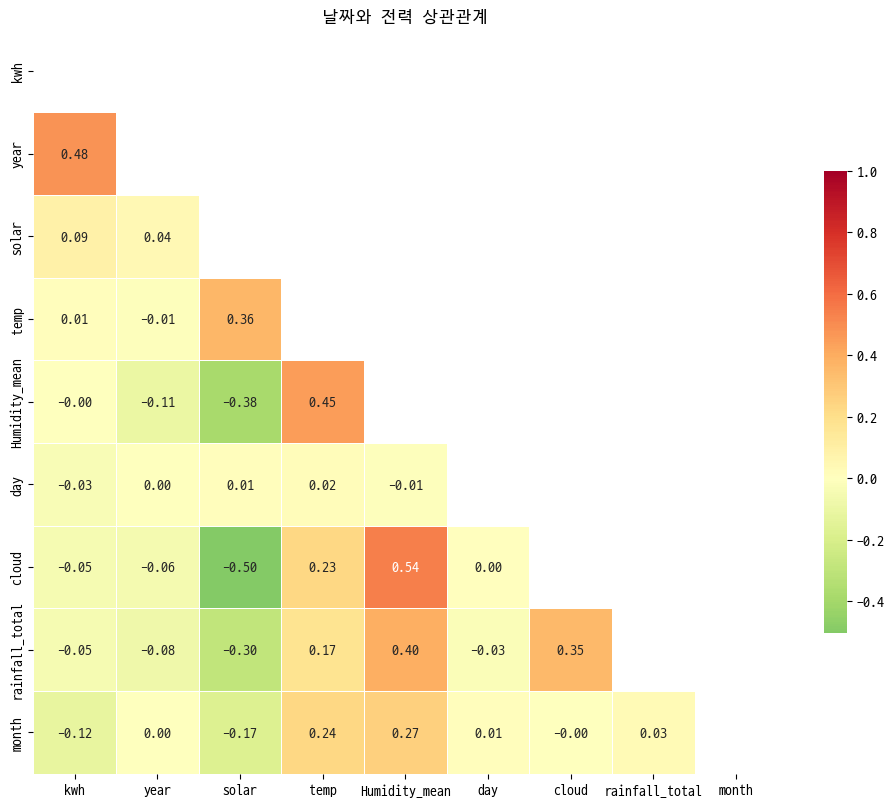

In [299]:
kw_matrix = day_df.corr()
kw_matrix = kw_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
kw_matrix = kw_matrix[kw_matrix.index]
kw_matrix
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(kw_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("날짜와 전력 상관관계")

In [300]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [301]:
day_df_corr = day_df.corr()
day_df_corr_sort = day_df_corr.sort_values('kwh', ascending=False)
day_df_corr_sort.head(10)

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,kwh
kwh,4.785837e-01,-1.160759e-01,-3.036295e-02,0.010711,-0.045427,-0.047179,-0.002572,0.087828,1.000000
year,1.000000e+00,7.923551e-13,9.339728e-14,-0.014896,-0.056904,-0.082066,-0.106679,0.041920,0.478584
solar,4.191976e-02,-1.712911e-01,8.487703e-03,0.363903,-0.502836,-0.295780,-0.381615,1.000000,0.087828
temp,-1.489575e-02,2.364771e-01,1.888007e-02,1.000000,0.234163,0.173773,0.449717,0.363903,0.010711
Humidity_mean,-1.066792e-01,2.661744e-01,-1.242073e-02,0.449717,0.540440,0.395061,1.000000,-0.381615,-0.002572
day,9.339728e-14,1.189318e-02,1.000000e+00,0.018880,0.002274,-0.026867,-0.012421,0.008488,-0.030363
cloud,-5.690377e-02,-2.294342e-03,2.274415e-03,0.234163,1.000000,0.348429,0.540440,-0.502836,-0.045427
rainfall_total,-8.206610e-02,3.336828e-02,-2.686715e-02,0.173773,0.348429,1.000000,0.395061,-0.295780,-0.047179
month,7.923551e-13,1.000000e+00,1.189318e-02,0.236477,-0.002294,0.033368,0.266174,-0.171291,-0.116076


In [302]:
day_df.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'kwh'],
      dtype='object')

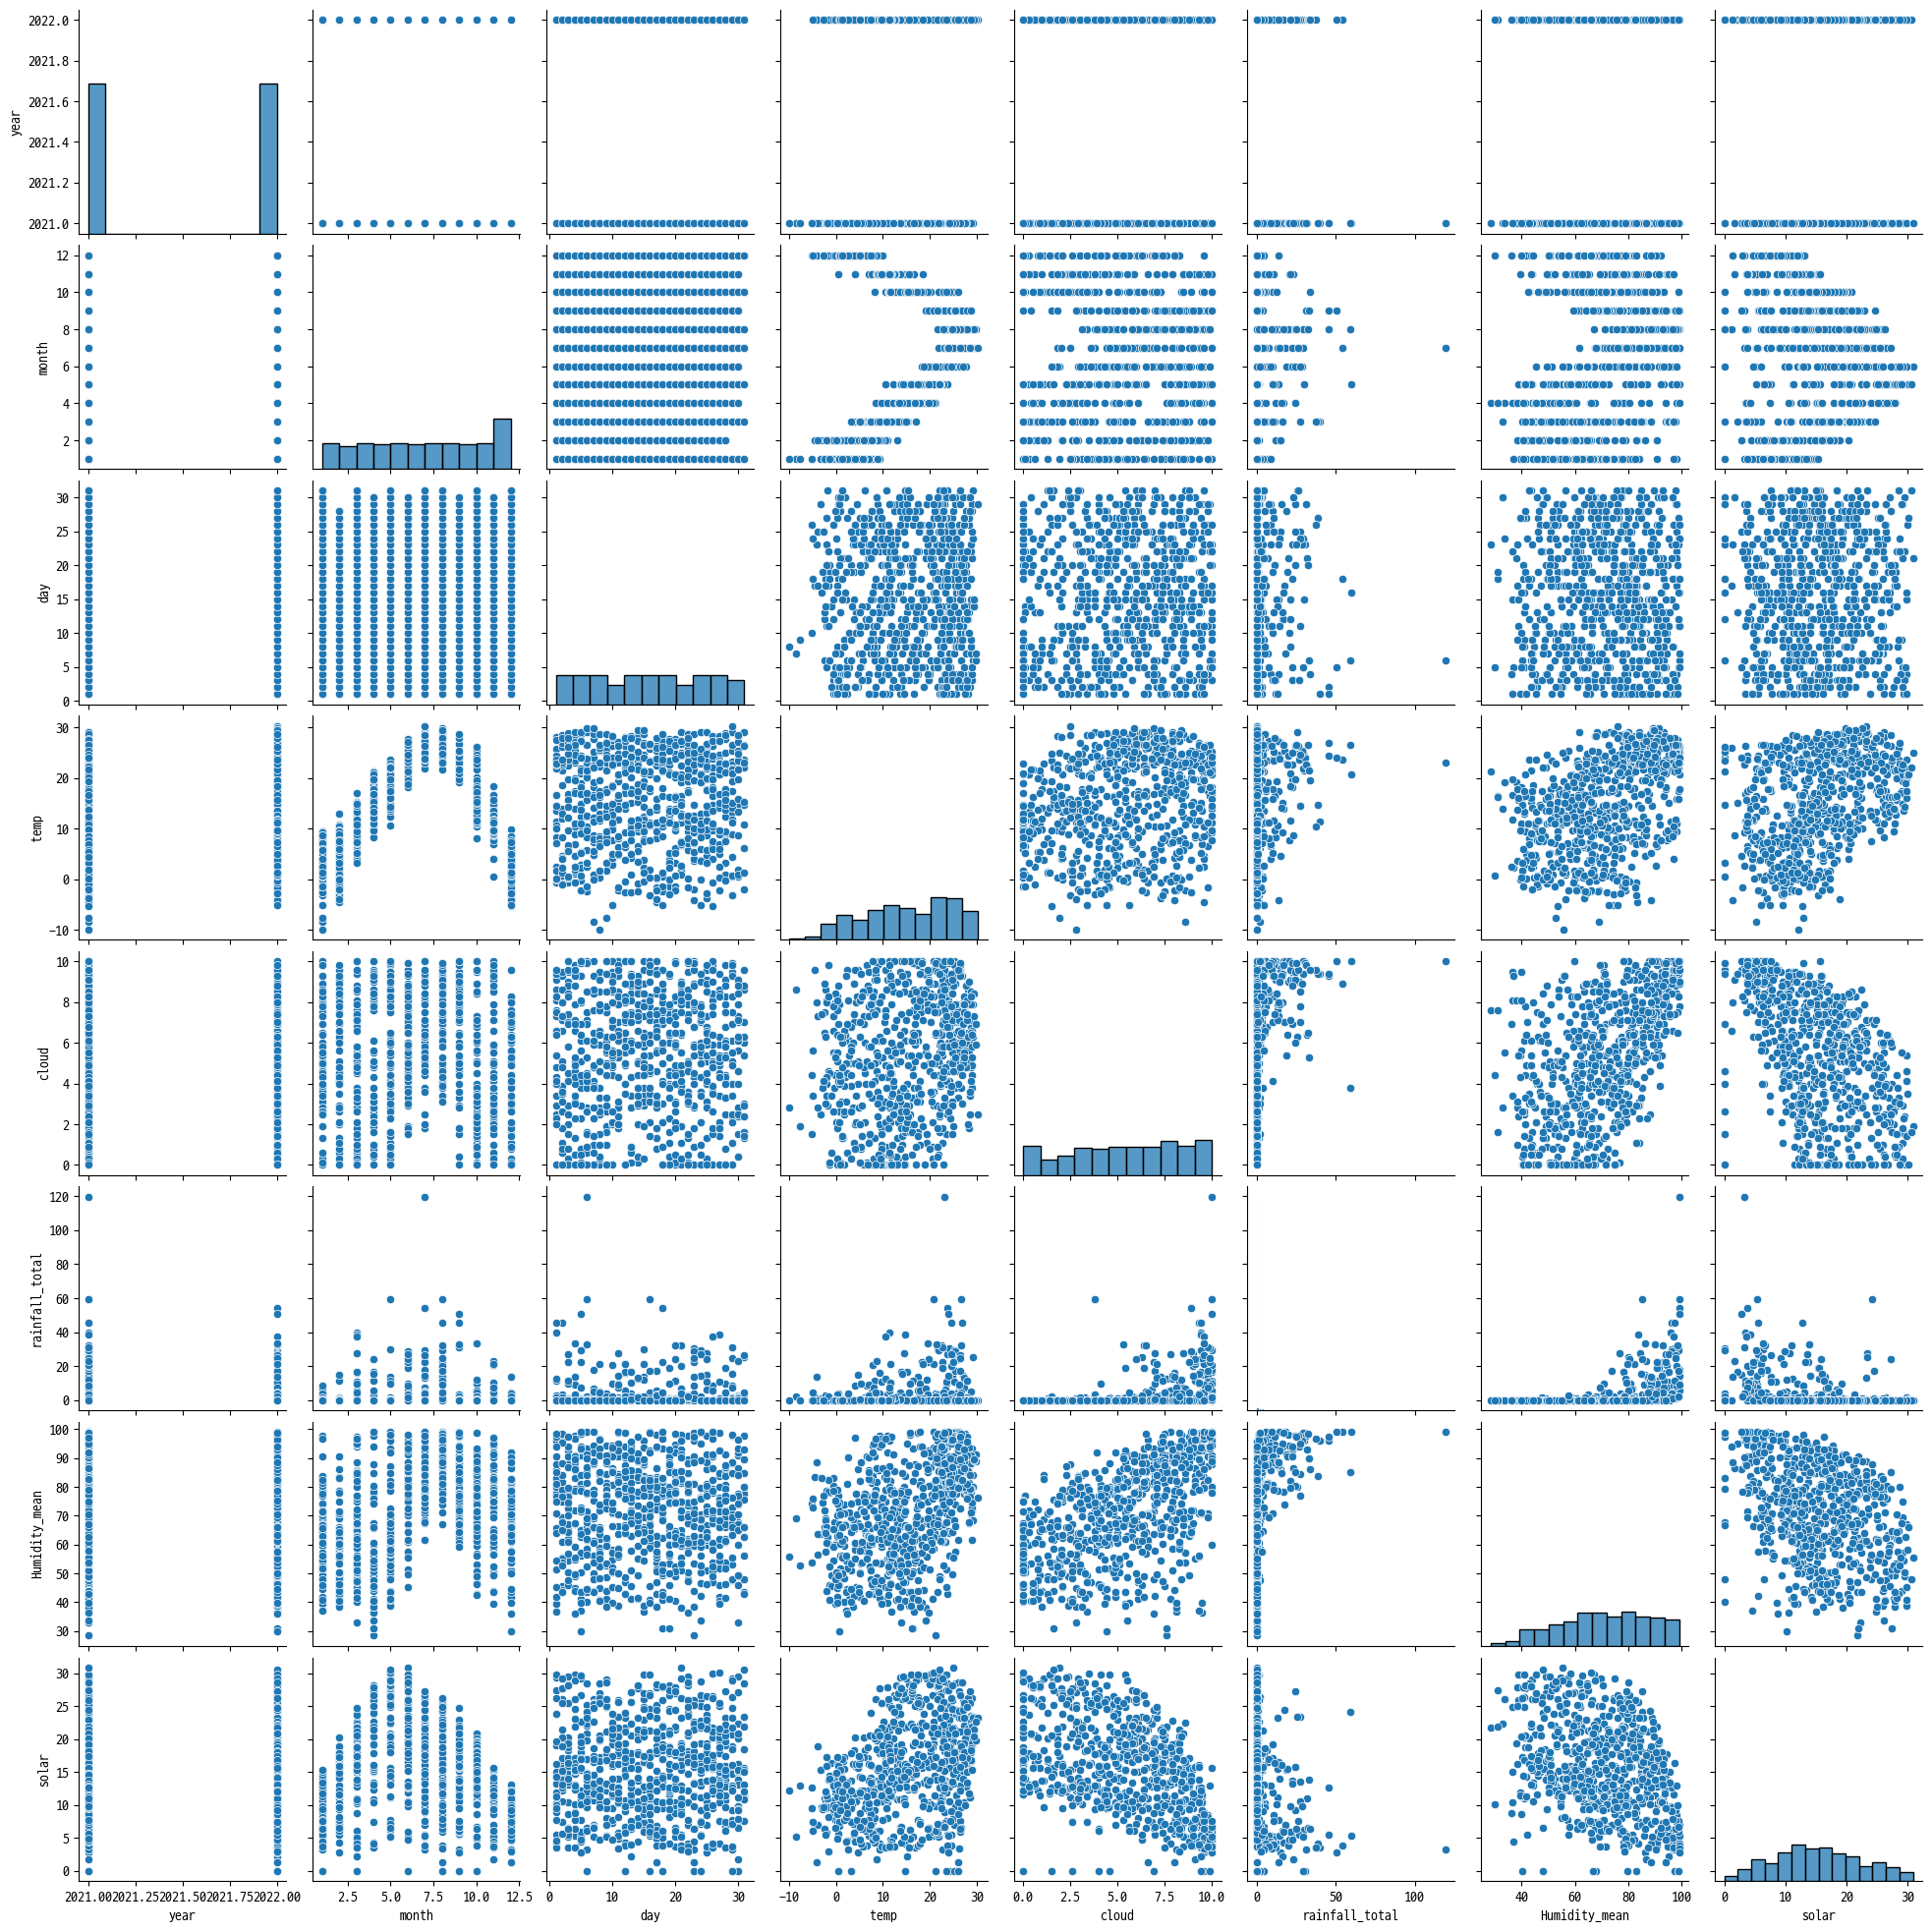

In [303]:
cols = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar']
sns.pairplot(day_df[cols])
plt.show()

In [304]:
cols_train = ['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar']
X_train_pre = day_df[cols_train]
y = day_df['kwh'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [305]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                90        
                                                                 
 dense_29 (Dense)            (None, 30)                330       
                                                                 
 dense_30 (Dense)            (None, 40)                1240      
                                                                 
 dense_31 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [306]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [307]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=400)

modelpath = 'kw_day_weather1.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=4000, batch_size=32, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/4000
14/14 [==============================] - 1s 10ms/step - loss: 215732147191808.0000 - val_loss: 202508077105152.0000
Epoch 2/4000
14/14 [==============================] - 0s 4ms/step - loss: 215728036773888.0000 - val_loss: 202504033796096.0000
Epoch 3/4000
14/14 [==============================] - 0s 5ms/step - loss: 215723355930624.0000 - val_loss: 202498346319872.0000
Epoch 4/4000
14/14 [==============================] - 0s 4ms/step - loss: 215716041064448.0000 - val_loss: 202488967856128.0000
Epoch 5/4000
14/14 [==============================] - 0s 5ms/step - loss: 215703911137280.0000 - val_loss: 202473969025024.0000
Epoch 6/4000
14/14 [==============================] - 0s 5ms/step - loss: 215685053546496.0000 - val_loss: 202451001016320.0000
Epoch 7/4000
14/14 [==============================] - 0s 4ms/step - loss: 215656700051456.0000 - val_loss: 202416624500736.0000
Epoch 8/4000
14/14 [==============================] - 0s 4ms/step - loss: 215614572462080.0000 - val_lo

In [308]:
real_kwh = []
pred_kwh = []
X_num = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh.append(real)
    pred_kwh.append(prediction)
    n_iter += 1
    X_num.append(n_iter)


5/5 [==============================] - 0s 1ms/step
실제 전력 : 12851421.38, 예상전력 : 14030147.00
실제 전력 : 11297349.15, 예상전력 : 14158833.00
실제 전력 : 13207403.62, 예상전력 : 14174607.00
실제 전력 : 19412984.43, 예상전력 : 14514830.00
실제 전력 : 11683753.69, 예상전력 : 14238488.00
실제 전력 : 19135174.09, 예상전력 : 14222442.00
실제 전력 : 14304453.00, 예상전력 : 14386385.00
실제 전력 : 22035589.77, 예상전력 : 14349353.00
실제 전력 : 10853492.22, 예상전력 : 14130180.00
실제 전력 : 18929507.30, 예상전력 : 14290305.00
실제 전력 : 14317723.49, 예상전력 : 14348698.00
실제 전력 : 19238238.87, 예상전력 : 14403603.00
실제 전력 : 18754004.74, 예상전력 : 14304157.00
실제 전력 : 22674701.41, 예상전력 : 14061341.00
실제 전력 : 13621274.81, 예상전력 : 14269125.00
실제 전력 : 22004904.71, 예상전력 : 13623563.00
실제 전력 : 16202312.51, 예상전력 : 14062880.00
실제 전력 : 15560029.82, 예상전력 : 13991444.00
실제 전력 : 11642488.34, 예상전력 : 13770878.00
실제 전력 : 15323802.67, 예상전력 : 14317871.00
실제 전력 : 17415336.74, 예상전력 : 14106299.00
실제 전력 : 13077450.46, 예상전력 : 14336320.00
실제 전력 : 10170390.87, 예상전력 : 14287395.00
실제 전력 : 24681895.13, 예상전력 : 1

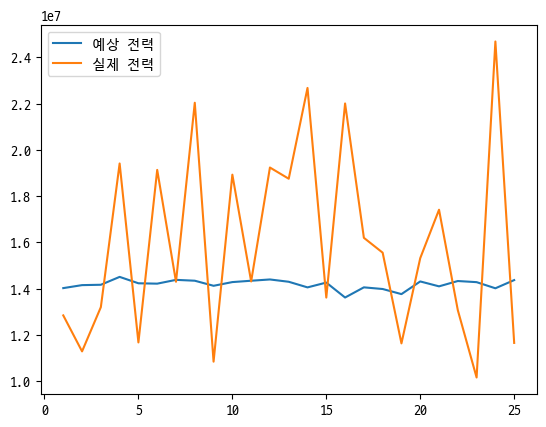

In [309]:
plt.plot(X_num, pred_kwh, label = '예상 전력')
plt.plot(X_num, real_kwh, label = '실제 전력')
plt.legend()
plt.show()

In [310]:
day_df.head(2)

,year,month,day,temp,cloud,rainfall_total,Humidity_mean,solar,kwh
0,2021,1,1,-0.6,7.3,0.0,83.1,9.00,11154070.87
1,2021,1,2,-0.3,3.8,0.5,67.8,12.54,10820313.94


In [311]:
# 상관관계 도출
corr_matrix = day_df.corr()
corr_matrix = corr_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]
corr_matrix

,kwh,year,solar,temp,Humidity_mean,day,cloud,rainfall_total,month
kwh,1.000000,4.785837e-01,0.087828,0.010711,-0.002572,-3.036295e-02,-0.045427,-0.047179,-1.160759e-01
year,0.478584,1.000000e+00,0.041920,-0.014896,-0.106679,9.339728e-14,-0.056904,-0.082066,7.923551e-13
solar,0.087828,4.191976e-02,1.000000,0.363903,-0.381615,8.487703e-03,-0.502836,-0.295780,-1.712911e-01
temp,0.010711,-1.489575e-02,0.363903,1.000000,0.449717,1.888007e-02,0.234163,0.173773,2.364771e-01
Humidity_mean,-0.002572,-1.066792e-01,-0.381615,0.449717,1.000000,-1.242073e-02,0.540440,0.395061,2.661744e-01
day,-0.030363,9.339728e-14,0.008488,0.018880,-0.012421,1.000000e+00,0.002274,-0.026867,1.189318e-02
cloud,-0.045427,-5.690377e-02,-0.502836,0.234163,0.540440,2.274415e-03,1.000000,0.348429,-2.294342e-03
rainfall_total,-0.047179,-8.206610e-02,-0.295780,0.173773,0.395061,-2.686715e-02,0.348429,1.000000,3.336828e-02
month,-0.116076,7.923551e-13,-0.171291,0.236477,0.266174,1.189318e-02,-0.002294,0.033368,1.000000e+00


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

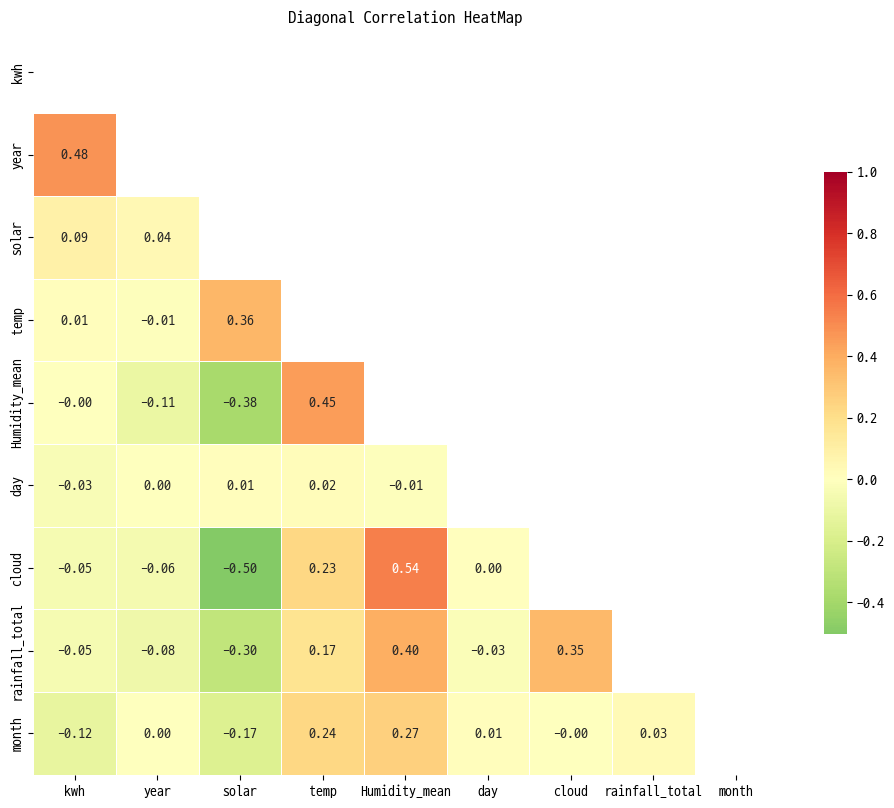

In [312]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = day_df.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [313]:
day_df.columns

Index(['year', 'month', 'day', 'temp', 'cloud', 'rainfall_total',
       'Humidity_mean', 'solar', 'kwh'],
      dtype='object')

In [314]:
day_df_kw = day_df.drop(columns=['temp', 'cloud', 'rainfall_total', 'Humidity_mean', 'solar'])

In [315]:
# 상관관계 도출
corr_matrix = day_df_kw.corr()
corr_matrix = corr_matrix.sort_values(by = 'kwh', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]
corr_matrix

,kwh,year,day,month
kwh,1.000000,4.785837e-01,-3.036295e-02,-1.160759e-01
year,0.478584,1.000000e+00,9.339728e-14,7.923551e-13
day,-0.030363,9.339728e-14,1.000000e+00,1.189318e-02
month,-0.116076,7.923551e-13,1.189318e-02,1.000000e+00


Text(0.5, 1.0, 'Diagonal Correlation HeatMap')

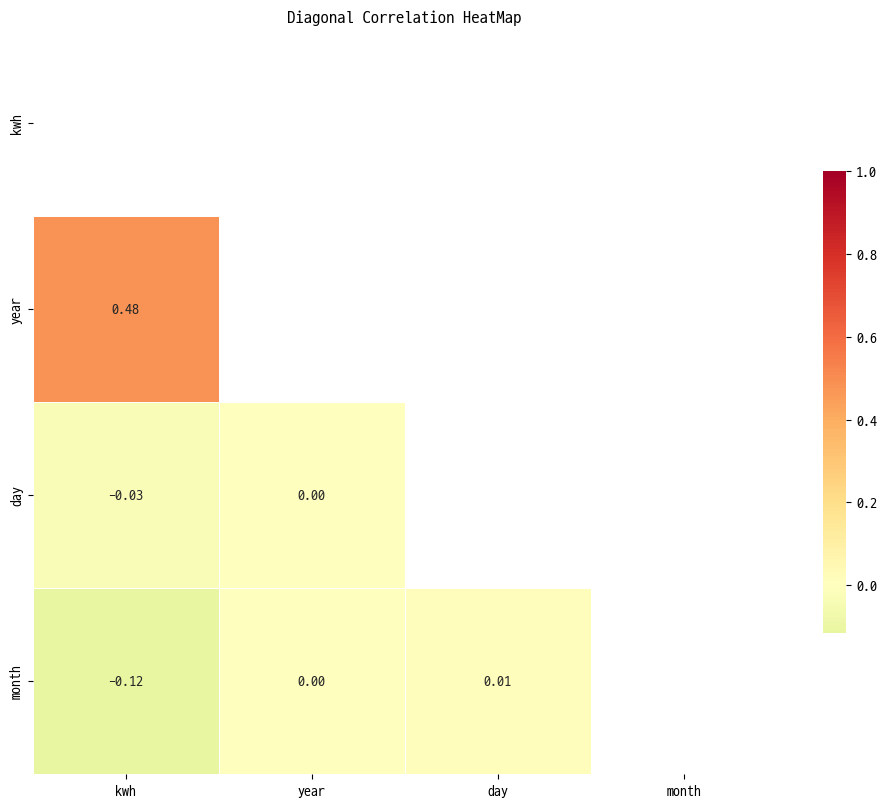

In [316]:
# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(12, 12))
corr = day_df_kw.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype='bool')
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Diagonal Correlation HeatMap")

In [317]:
day_df_kw.head(2)

,year,month,day,kwh
0,2021,1,1,11154070.87
1,2021,1,2,10820313.94


In [318]:
day_df_kw['date'] = pd.to_datetime(day_df_kw[['year', 'month', 'day']])

In [319]:
day_df_kw.head(2)

,year,month,day,kwh,date
0,2021,1,1,11154070.87,2021-01-01
1,2021,1,2,10820313.94,2021-01-02


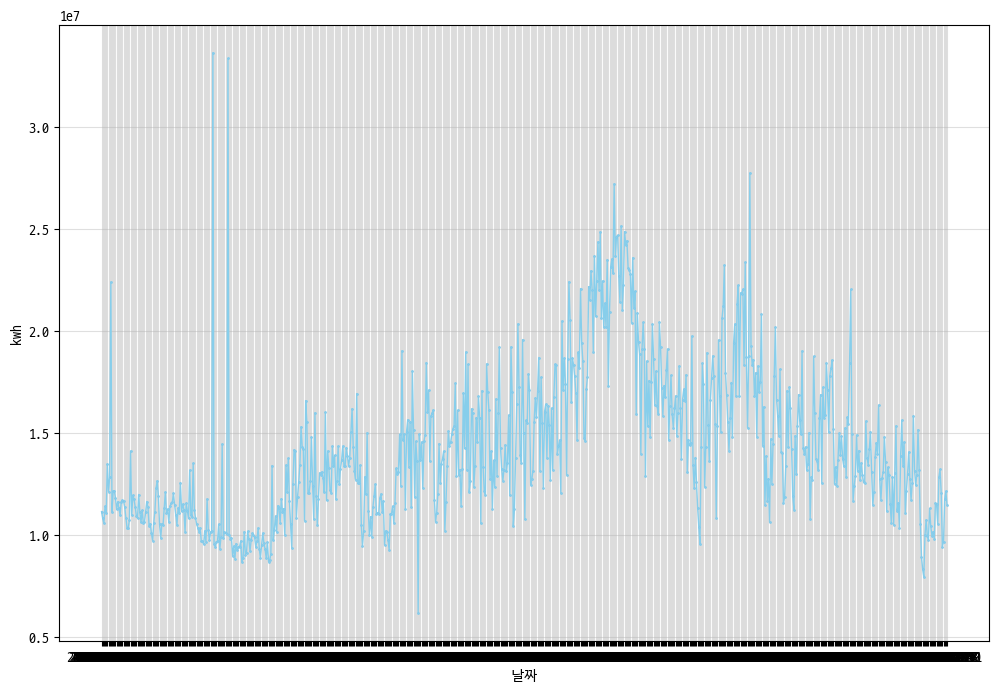

In [320]:
# 날짜에 따른 kwh 추이 시각화
plt.figure(figsize=(12,8))
plt.plot('date', 'kwh', data=day_df_kw, marker='o', markerfacecolor='blue',
         markersize=1, color='skyblue', linewidth=1)
plt.xticks(day_df_kw['date']) # 날짜 표시
plt.grid(linestyle='-', alpha=0.4)
plt.ylabel('kwh')
plt.xlabel('날짜')
plt.show()

In [321]:
day_df_kw['kwh'].max()

33619790.7

In [322]:
day_df_kw.head()

,year,month,day,kwh,date
0,2021,1,1,11154070.87,2021-01-01
1,2021,1,2,10820313.94,2021-01-02
2,2021,1,3,10577876.27,2021-01-03
3,2021,1,4,11410542.58,2021-01-04
4,2021,1,5,11097614.74,2021-01-05


In [323]:
cols_train = ['year', 'month', 'day']
X_train_pre = day_df_kw[cols_train]
y = day_df_kw['kwh'].values
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2)

In [324]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                40        
                                                                 
 dense_33 (Dense)            (None, 30)                330       
                                                                 
 dense_34 (Dense)            (None, 40)                1240      
                                                                 
 dense_35 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,651
Trainable params: 1,651
Non-trainable params: 0
_________________________________________________________________


In [325]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [326]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=200)

modelpath = 'kw_day1.hdf5'

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)

history = model.fit(X_train, y_train, validation_split=0.25, epochs=4000, batch_size=32, callbacks=[early_stopping_callback,checkpointer])

Epoch 1/4000
14/14 [==============================] - 1s 10ms/step - loss: 218137345654784.0000 - val_loss: 209619049775104.0000
Epoch 2/4000
14/14 [==============================] - 0s 5ms/step - loss: 218125232504832.0000 - val_loss: 209608463351808.0000
Epoch 3/4000
14/14 [==============================] - 0s 5ms/step - loss: 218113605894144.0000 - val_loss: 209595528118272.0000
Epoch 4/4000
14/14 [==============================] - 0s 4ms/step - loss: 218097818533888.0000 - val_loss: 209576016216064.0000
Epoch 5/4000
14/14 [==============================] - 0s 5ms/step - loss: 218073961332736.0000 - val_loss: 209546505093120.0000
Epoch 6/4000
14/14 [==============================] - 0s 4ms/step - loss: 218036799799296.0000 - val_loss: 209501290496000.0000
Epoch 7/4000
14/14 [==============================] - 0s 4ms/step - loss: 217980881338368.0000 - val_loss: 209431849598976.0000
Epoch 8/4000
14/14 [==============================] - 0s 4ms/step - loss: 217896659714048.0000 - val_lo

In [327]:
real_kwh2 = []
pred_kwh2 = []
X_num2 = []

n_iter = 0
Y_prediction = model.predict(X_test).flatten()
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh2.append(real)
    pred_kwh2.append(prediction)
    n_iter += 1
    X_num2.append(n_iter)

5/5 [==============================] - 0s 1ms/step
실제 전력 : 11935560.80, 예상전력 : 14214880.00
실제 전력 : 11034311.57, 예상전력 : 14227539.00
실제 전력 : 12488712.08, 예상전력 : 14241833.00
실제 전력 : 11319210.75, 예상전력 : 14205523.00
실제 전력 : 13874046.82, 예상전력 : 14291482.00
실제 전력 : 17754430.03, 예상전력 : 14262858.00
실제 전력 : 13985687.98, 예상전력 : 14274682.00
실제 전력 : 11249970.23, 예상전력 : 14225868.00
실제 전력 : 13614177.18, 예상전력 : 14297129.00
실제 전력 : 18617994.06, 예상전력 : 14263415.00
실제 전력 : 6200904.63, 예상전력 : 14212691.00
실제 전력 : 18521204.07, 예상전력 : 14245261.00
실제 전력 : 9996657.93, 예상전력 : 14229451.00
실제 전력 : 22035589.77, 예상전력 : 14230969.00
실제 전력 : 21194983.74, 예상전력 : 14266998.00
실제 전력 : 18167874.42, 예상전력 : 14241678.00
실제 전력 : 22958409.55, 예상전력 : 14199877.00
실제 전력 : 16001757.56, 예상전력 : 14237577.00
실제 전력 : 15426787.83, 예상전력 : 14237855.00
실제 전력 : 18968075.03, 예상전력 : 14246251.00
실제 전력 : 16995721.03, 예상전력 : 14273328.00
실제 전력 : 10853492.22, 예상전력 : 14256125.00
실제 전력 : 18386948.46, 예상전력 : 14300712.00
실제 전력 : 13408822.34, 예상전력 : 142

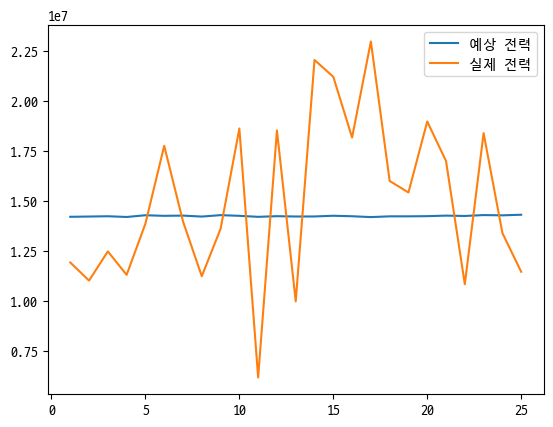

In [328]:
plt.plot(X_num2, pred_kwh2, label = '예상 전력')
plt.plot(X_num2, real_kwh2, label = '실제 전력')
plt.legend()
plt.show()

## 모델 교체

In [329]:
# 모델 평가식 정의
def smape(true, pred):
    v = 2 * abs(pred - true) / (abs(pred) + abs(true))
    output = np.mean(v) * 100
    return output

In [330]:
# Year, Month, Day 컬럼만 변수로 활용
X = day_df_kw.iloc[:,:3] 
X

,year,month,day
0,2021,1,1
1,2021,1,2
2,2021,1,3
3,2021,1,4
4,2021,1,5
...,...,...,...
725,2022,12,27
726,2022,12,28
727,2022,12,29
728,2022,12,30


In [331]:
y_s = day_df_kw.iloc[:,:4] 
y_s['kwh']

0      11154070.87
1      10820313.94
2      10577876.27
3      11410542.58
4      11097614.74
          ...     
725     9442942.40
726     9679363.18
727    11754265.48
728    12149583.10
729    11472992.97
Name: kwh, Length: 730, dtype: float64

In [332]:
from sklearn.ensemble import RandomForestRegressor

In [333]:
# 모델 학습과 검증을 위한 데이터 준비
# 모델 정의 후 세대별로 학습 후 성능 검증

# y값은 전력량으로 설정
y = y_s['kwh']

# 학습/검증 데이터셋 정의
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.30, random_state = 42)

# 모델 정의
model = RandomForestRegressor(n_estimators = 20, random_state = 0, verbose = 0)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_val)

# 평가
result = smape(y_val, y_pred)

In [334]:
result

11.073078553317313

In [335]:
real_kwh2 = []
pred_kwh2 = []
X_num2 = []

n_iter = 0
y_prediction = model.predict(X_val).flatten()
for i in range(25):
    real = y_val.values[i]
    prediction = y_prediction[i]
    print("실제 전력 : {:.2f}, 예상전력 : {:.2f}".format(real, prediction))
    real_kwh2.append(real)
    pred_kwh2.append(prediction)
    n_iter += 1
    X_num2.append(n_iter)

실제 전력 : 19135174.09, 예상전력 : 15935583.10
실제 전력 : 9745642.88, 예상전력 : 12219454.29
실제 전력 : 14932870.59, 예상전력 : 14936153.30
실제 전력 : 10424313.28, 예상전력 : 17219200.59
실제 전력 : 10389815.95, 예상전력 : 12112564.39
실제 전력 : 15541533.18, 예상전력 : 13693941.74
실제 전력 : 10170177.04, 예상전력 : 11222101.74
실제 전력 : 10853492.22, 예상전력 : 10815360.83
실제 전력 : 9427237.72, 예상전력 : 9954079.69
실제 전력 : 15981043.45, 예상전력 : 16897104.35
실제 전력 : 14289218.09, 예상전력 : 15686141.39
실제 전력 : 10004384.45, 예상전력 : 9785778.85
실제 전력 : 10889998.51, 예상전력 : 11205638.94
실제 전력 : 20191737.02, 예상전력 : 19956921.52
실제 전력 : 14345261.45, 예상전력 : 13040070.04
실제 전력 : 9702953.98, 예상전력 : 10609603.30
실제 전력 : 18847353.03, 예상전력 : 18276192.27
실제 전력 : 11144786.22, 예상전력 : 11533213.67
실제 전력 : 14016939.48, 예상전력 : 13575129.60
실제 전력 : 9442716.28, 예상전력 : 10319326.73
실제 전력 : 16044863.71, 예상전력 : 16246999.78
실제 전력 : 24849729.47, 예상전력 : 23000654.10
실제 전력 : 13267265.40, 예상전력 : 12266890.27
실제 전력 : 17188119.82, 예상전력 : 19048405.10
실제 전력 : 14344592.27, 예상전력 : 12805754.65


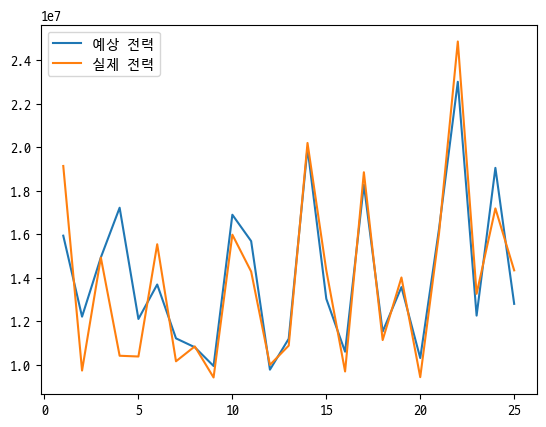

In [336]:
plt.plot(X_num2, pred_kwh2, label = '예상 전력')
plt.plot(X_num2, real_kwh2, label = '실제 전력')
plt.legend()
plt.show()